In [62]:
import pandas as pd
import numpy as np
import lazypredict
import sklearn
import xgboost
import lightgbm
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from lazypredict.Supervised import LazyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score 
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
data_url = ("/Users/vidyakumar/Desktop/python/apziva/term-deposit-marketing-2020.csv")

In [3]:
def load_data():
    data = pd.read_csv(data_url)
    return data

data = load_data()

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [5]:
data_job1 = pd.get_dummies(data['job'], prefix = 'job', prefix_sep = '_')
data_job1.head()

,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1


In [6]:
data_job2 = pd.get_dummies(data['job'], prefix = 'job', prefix_sep = '_', drop_first = True)
data_job2.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1


In [7]:
data_job = pd.get_dummies(data['job'], prefix = 'job', prefix_sep = '_', drop_first = True)
data_marital = pd.get_dummies(data['marital'], prefix = 'marital', prefix_sep = '_', drop_first = True)
data_education = pd.get_dummies(data['education'], prefix = 'education', prefix_sep = '_', drop_first = True)
data_default = pd.get_dummies(data['default'], prefix = 'default', prefix_sep = '_', drop_first = True)
data_housing = pd.get_dummies(data['housing'], prefix = 'housing', prefix_sep = '_', drop_first = True)
data_loan = pd.get_dummies(data['loan'], prefix = 'loan', prefix_sep = '_', drop_first = True)
data_contact = pd.get_dummies(data['contact'], prefix = 'contact', prefix_sep = '_', drop_first = True)
data_month = pd.get_dummies(data['month'], prefix = 'month', prefix_sep = '_', drop_first = True)
data_y = pd.get_dummies(data['y'], prefix = 'y', prefix_sep = '_', drop_first = True)

In [8]:
# Concat original data frame and dummy columns
data_dc = data.drop(columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'y'])
data_dc = pd.concat([data_dc, data_job, data_marital, data_education, data_default, data_housing, data_loan, data_contact, data_month, data_y], axis = 1)
data_dc.head()

,age,balance,day,duration,campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,y_yes
0,58,2143,5,261,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,29,5,151,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,2,5,76,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,47,1506,5,92,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,33,1,5,198,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [9]:
data_dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  40000 non-null  int64
 1   balance              40000 non-null  int64
 2   day                  40000 non-null  int64
 3   duration             40000 non-null  int64
 4   campaign             40000 non-null  int64
 5   job_blue-collar      40000 non-null  uint8
 6   job_entrepreneur     40000 non-null  uint8
 7   job_housemaid        40000 non-null  uint8
 8   job_management       40000 non-null  uint8
 9   job_retired          40000 non-null  uint8
 10  job_self-employed    40000 non-null  uint8
 11  job_services         40000 non-null  uint8
 12  job_student          40000 non-null  uint8
 13  job_technician       40000 non-null  uint8
 14  job_unemployed       40000 non-null  uint8
 15  job_unknown          40000 non-null  uint8
 16  marital_married      4

In [10]:
#checking if its balanced dataset -- imbalanced dataset
data_dc['y_yes'].value_counts()

0    37104
1     2896
Name: y_yes, dtype: int64

In [11]:
data_dc.describe()

,age,balance,day,duration,campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,y_yes
count,40000.00,40000.00,40000.00,40000.00,40000.00,40000.00,40000.00,40000.00,40000.00,40000.00,...,40000.00,40000.00,40000.00,40000.00,40000.00,40000.00,40000.00,40000.00,40000.00,40000.00
mean,40.54,1274.28,16.02,254.82,2.88,0.23,0.04,0.03,0.20,0.04,...,0.00,0.06,0.03,0.16,0.12,0.01,0.34,0.09,0.00,0.07
std,9.64,2903.77,8.28,259.37,3.24,0.42,0.18,0.16,0.40,0.19,...,0.02,0.23,0.17,0.37,0.32,0.08,0.47,0.29,0.04,0.26
min,19.00,-8019.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,33.00,54.00,8.00,100.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,39.00,407.00,17.00,175.00,2.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,48.00,1319.00,21.00,313.00,3.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [12]:
X = data_dc.drop(columns = ['y_yes'])
y = data_dc['y_yes']

In [13]:
rs=12
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = rs)
print(X_train.shape)           
print(X_test.shape)

(32000, 36)
(8000, 36)


In [14]:
#random oversampling
ros = RandomOverSampler(random_state = rs)     
X_ros, y_ros = ros.fit_resample(X_train, y_train) 

In [15]:
pd.value_counts(y_ros) 

1    29692
0    29692
Name: y_yes, dtype: int64

In [16]:
lazypredict.Supervised.CLASSIFIERS

[('AdaBoostClassifier', sklearn.ensemble._weight_boosting.AdaBoostClassifier),
 ('BaggingClassifier', sklearn.ensemble._bagging.BaggingClassifier),
 ('BernoulliNB', sklearn.naive_bayes.BernoulliNB),
 ('CalibratedClassifierCV', sklearn.calibration.CalibratedClassifierCV),
 ('CategoricalNB', sklearn.naive_bayes.CategoricalNB),
 ('DecisionTreeClassifier', sklearn.tree._classes.DecisionTreeClassifier),
 ('DummyClassifier', sklearn.dummy.DummyClassifier),
 ('ExtraTreeClassifier', sklearn.tree._classes.ExtraTreeClassifier),
 ('ExtraTreesClassifier', sklearn.ensemble._forest.ExtraTreesClassifier),
 ('GaussianNB', sklearn.naive_bayes.GaussianNB),
 ('KNeighborsClassifier',
  sklearn.neighbors._classification.KNeighborsClassifier),
 ('LabelPropagation',
  sklearn.semi_supervised._label_propagation.LabelPropagation),
 ('LabelSpreading', sklearn.semi_supervised._label_propagation.LabelSpreading),
 ('LinearDiscriminantAnalysis',
  sklearn.discriminant_analysis.LinearDiscriminantAnalysis),
 ('Linear

In [17]:
#logistic regression - ros
logisticRegr = LogisticRegression()
lr = logisticRegr.fit(X_ros, y_ros)
y_pred=logisticRegr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.84      0.91      7412
           1       0.28      0.77      0.41       588

    accuracy                           0.84      8000
   macro avg       0.63      0.81      0.66      8000
weighted avg       0.93      0.84      0.87      8000



In [18]:
# predict probabilities 
y_prob=logisticRegr.predict_proba(X_test)
print(y_prob)

[[0.54566977 0.45433023]
 [0.00892116 0.99107884]
 [0.59851574 0.40148426]
 ...
 [0.7094422  0.2905578 ]
 [0.92941081 0.07058919]
 [0.90680469 0.09319531]]


In [19]:
# keep probabilities for the positive outcome only
probs = y_prob[:, 1]

In [20]:
# calculate roc auc
auc = roc_auc_score(y_test, probs)
print(auc)

0.897294009346858


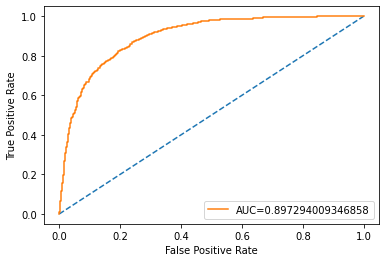

In [21]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
# show the plot
plt.show()

In [22]:
cross_val_score(logisticRegr, X_ros, y_ros, cv=5)

array([0.83792203, 0.83834302, 0.82445062, 0.82099857, 0.82502526])

In [23]:
#smote balancing
smo = SMOTE(random_state = rs)                      # Create an instance of SMOTE
X_smo, y_smo = smo.fit_resample(X_train, y_train)           # Resample the training data

In [24]:
pd.value_counts(y_smo)                                      # Get counts after class balancing

1    29692
0    29692
Name: y_yes, dtype: int64

In [25]:
#logistic regression - smote
logisticRegr = LogisticRegression()
lr_smo = logisticRegr.fit(X_smo, y_smo)
y_pred_smo=logisticRegr.predict(X_test)
print(classification_report(y_test, y_pred_smo))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94      7412
           1       0.35      0.57      0.43       588

    accuracy                           0.89      8000
   macro avg       0.65      0.74      0.68      8000
weighted avg       0.92      0.89      0.90      8000



In [26]:
# predict probabilities 
y_prob_smo=logisticRegr.predict_proba(X_test)
print(y_prob_smo)

[[8.93567859e-01 1.06432141e-01]
 [1.85878917e-03 9.98141211e-01]
 [9.03991110e-01 9.60088897e-02]
 ...
 [5.28130724e-01 4.71869276e-01]
 [9.99208745e-01 7.91254909e-04]
 [9.53902105e-01 4.60978949e-02]]


In [27]:
# keep probabilities for the positive outcome only
probs = y_prob_smo[:, 1]

In [28]:
# calculate roc auc
auc = roc_auc_score(y_test, probs)
print(auc)

0.8685226384131635


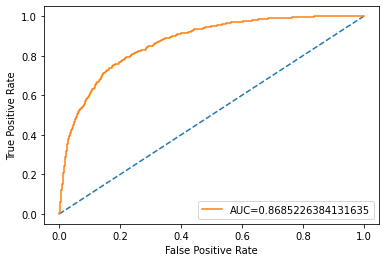

In [29]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
# show the plot
plt.show()

In [30]:
cross_val_score(logisticRegr, X_smo, y_smo, cv=5) 

array([0.84651006, 0.91731919, 0.91336196, 0.91740338, 0.91478612])

In [31]:
#random undersampling
rus = RandomUnderSampler(random_state = rs)               # Create an instance of RandomUnderSampler
X_rus, y_rus = rus.fit_resample(X_train, y_train)                 # Resample training data

In [32]:
pd.value_counts(y_rus)

1    2308
0    2308
Name: y_yes, dtype: int64

In [33]:
#logistic regression - rus
logisticRegr = LogisticRegression()
lr_rus = logisticRegr.fit(X_rus, y_rus)
y_pred_rus=logisticRegr.predict(X_test)
print(classification_report(y_test, y_pred_rus))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7412
           1       0.31      0.82      0.45       588

    accuracy                           0.85      8000
   macro avg       0.65      0.84      0.68      8000
weighted avg       0.93      0.85      0.88      8000



In [34]:
# predict probabilities 
y_prob_rus=logisticRegr.predict_proba(X_test)
probs = y_prob_rus[:, 1]

In [35]:
auc = roc_auc_score(y_test, probs)
print(auc)

0.9144455947516621


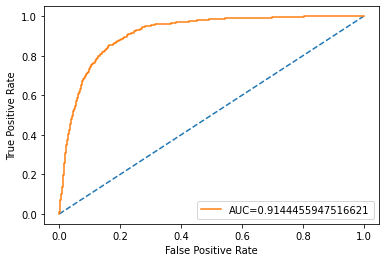

In [36]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
# show the plot
plt.show()

In [37]:
cross_val_score(logisticRegr, X_rus, y_rus, cv=5) 

array([0.81060606, 0.83098592, 0.82881907, 0.81690141, 0.80173348])

In [38]:
#Given that F1 score and CV values are the best for SMOTE balancing, we would further build models using Smote values

In [39]:
#knn classifier - smote
k_range = range(1,50)                                
scores = {}                                          
score_list = []                                     
for k in k_range:                                    
    knn = KNeighborsClassifier(n_neighbors = k)     
    knn.fit(X_smo, y_smo)                        
    y_pred_knn = knn.predict(X_test)                 
    scores[k] = f1_score(y_test, y_pred_knn)         
    score_list.append(f1_score(y_test, y_pred_knn))  


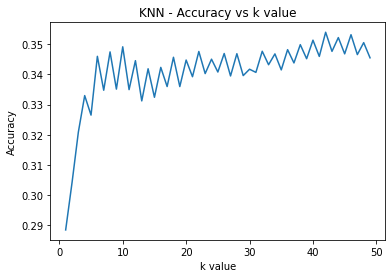

In [40]:
#identifying k value for best accuracy
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range, score_list)                   
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('KNN - Accuracy vs k value')
plt.show()

In [41]:
print(max(score_list))
print(max(scores, key=scores.get))

0.35399673735725934
42


In [42]:
#building the final knn model with k=10
knnc = KNeighborsClassifier(n_neighbors = 42)     
knf = knnc.fit(X_smo, y_smo)                        
y_pred_knn = knnc.predict(X_test) 
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      7412
           1       0.23      0.74      0.35       588

    accuracy                           0.80      8000
   macro avg       0.60      0.77      0.62      8000
weighted avg       0.92      0.80      0.84      8000



In [45]:
#SVC - smote
svc = SVC()                                                     # Create an instance of SVC
svc.fit(X_smo, y_smo)                                           # Fit model with SMOTE oversampled training data
print(classification_report(y_test, svc.predict(X_test)))       # Generate classification report

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7412
           1       0.27      0.73      0.40       588

    accuracy                           0.84      8000
   macro avg       0.62      0.79      0.65      8000
weighted avg       0.92      0.84      0.87      8000



In [46]:
cross_val_score(svc, X_smo, y_smo, cv=5)

array([0.80129662, 0.79472931, 0.80516966, 0.80146502, 0.80060626])

In [48]:
#Xgbc - smote
xgbc = XGBClassifier()
xgbc.fit(X_smo, y_smo)
print(classification_report(y_test, xgbc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      7412
           1       0.50      0.54      0.52       588

    accuracy                           0.93      8000
   macro avg       0.73      0.75      0.74      8000
weighted avg       0.93      0.93      0.93      8000



In [49]:
cross_val_score(xgbc, X_smo, y_smo, cv=5)

array([0.83985855, 0.97516208, 0.97583565, 0.97398333, 0.97709667])

In [65]:
#lgbm - smote
lgbm = LGBMClassifier()                                         # Create an instance of LGBMClassifier
lgbm.fit(X_smo, y_smo)                                          # Fit model with SMOTE oversampled training data
print(classification_report(y_test, lgbm.predict(X_test)))      # Generate classification report

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      7412
           1       0.51      0.59      0.54       588

    accuracy                           0.93      8000
   macro avg       0.74      0.77      0.75      8000
weighted avg       0.93      0.93      0.93      8000



In [53]:
cross_val_score(lgbm, X_smo, y_smo, cv=5)

array([0.83851141, 0.97154164, 0.97263619, 0.97036289, 0.9731391 ])

In [55]:
#RFC - smote
rfc = RandomForestClassifier(n_jobs=2, random_state=rs)
rfc.fit(X_smo, y_smo)
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      7412
           1       0.52      0.43      0.47       588

    accuracy                           0.93      8000
   macro avg       0.74      0.70      0.72      8000
weighted avg       0.92      0.93      0.93      8000



In [67]:
#lgbm - rus
lgbm = LGBMClassifier()                                         
lgbm.fit(X_rus, y_rus)                                          
print(classification_report(y_test, lgbm.predict(X_test)))    

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      7412
           1       0.34      0.91      0.50       588

    accuracy                           0.86      8000
   macro avg       0.67      0.89      0.71      8000
weighted avg       0.94      0.86      0.89      8000



In [68]:
cross_val_score(lgbm, X_rus, y_rus, cv=5)

array([0.89177489, 0.8808234 , 0.89057421, 0.86673889, 0.87865655])

In [58]:
#Xgbc - rus
xgbc = XGBClassifier()
xgbc.fit(X_rus, y_rus)
print(classification_report(y_test, xgbc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      7412
           1       0.34      0.90      0.49       588

    accuracy                           0.86      8000
   macro avg       0.66      0.88      0.71      8000
weighted avg       0.94      0.86      0.89      8000



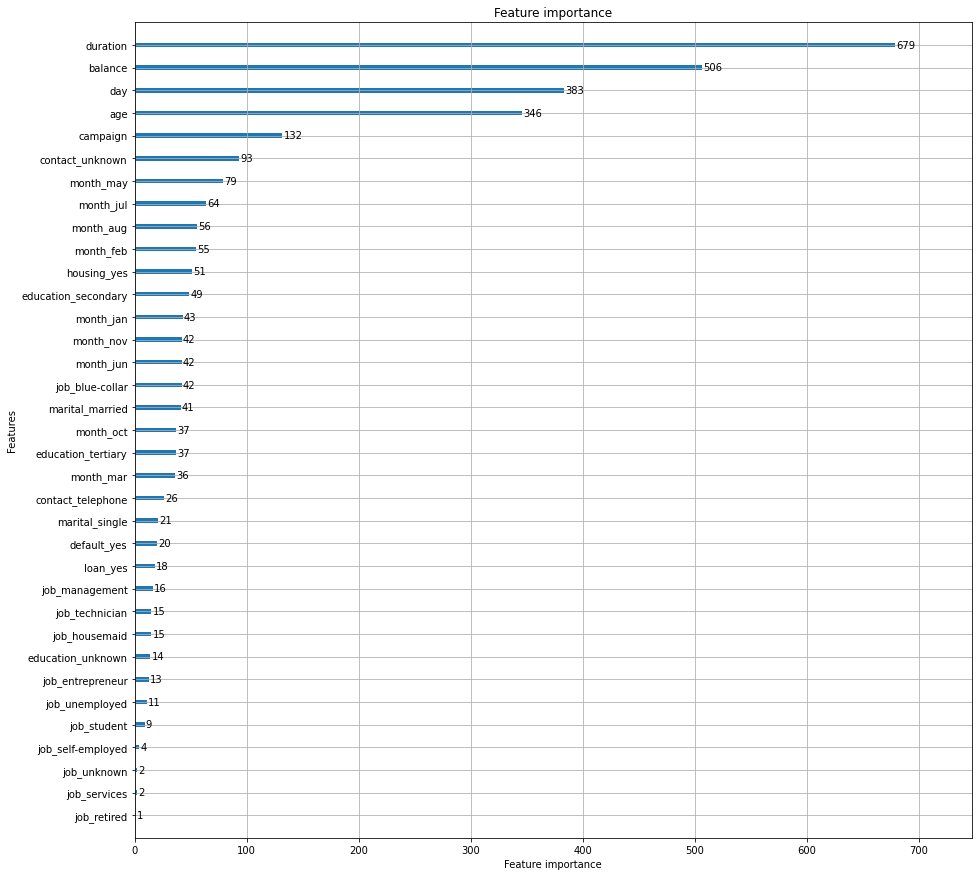

In [75]:
ax = lightgbm.plot_importance(lgbm, max_num_features=40, figsize=(15,15))
plt.show()

In [69]:
import eli5
from eli5.sklearn import PermutationImportance

perm_lgbm = PermutationImportance(lgbm, random_state=rs).fit(X_test, y_test)
eli5.show_weights(perm_lgbm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0803 ± 0.0052,duration
0.0514 ± 0.0030,contact_unknown
0.0424 ± 0.0024,month_aug
0.0423 ± 0.0062,day
0.0368 ± 0.0023,month_jul
0.0155 ± 0.0012,month_nov
0.0134 ± 0.0019,month_may
0.0122 ± 0.0009,month_jan
0.0110 ± 0.0009,month_feb
0.0087 ± 0.0023,housing_yes
